<h1>EDA</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', '{:.4f}'.format)

import warnings
warnings.simplefilter(action='ignore')

Read and concat the two datasets

In [2]:
final_rent_df = pd.read_csv('./data/final_rent_df.csv')
final_sale_df = pd.read_csv('./data/final_sale_df.csv')

In [3]:
final_df = pd.concat([final_rent_df, final_sale_df], ignore_index=True)

In [4]:
final_df.tail()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price,Sub_county
11327,"Riverside, Westlands",3.0000,3.0000,2024-01-07,"['Alarm', 'Backup Generator', 'Balcony', 'CCTV...",flats-apartments,sale,43500000,Westlands
11328,"5TH, Nyali Area, Nyali",3.0000,2.0000,2024-07-22,"['Backup Generator', 'Balcony', 'Bus Stop', 'C...",flats-apartments,sale,11250000,Unknown
11329,"Fourways Junction Estate, Kiambu Road",2.0000,2.0000,2024-07-16,"['Balcony', 'Electric Fence', 'En Suite', 'Fib...",flats-apartments,sale,9300000,Westlands
11330,"Waiyaki Way, Westlands",4.0000,6.0000,2024-04-16,[],flats-apartments,sale,80000000,Westlands
11331,"Westlands Area, Westlands",2.0000,2.0000,2024-04-16,[],flats-apartments,sale,28000000,Westlands


In [5]:
final_df.head()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price,Sub_county
0,Karen,5.0000,5.0000,2024-07-23,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,350000,Langata
1,"Windy Ridge, Karen",5.0000,5.0000,2024-07-25,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,380000,Langata
2,"Kyuna, Westlands",5.0000,5.0000,2024-07-19,"['Backup Generator', 'Balcony', 'En Suite', 'G...",houses,rent,430000,Westlands
3,"Lower kabete rd Nairobi, Lower Kabete, Westlands",4.0000,5.0000,2024-07-31,"['BBQ', 'Backup Generator', 'Balcony', 'Boreho...",houses,rent,4000,Westlands
4,"Runda, Two Rivers, Rosslyn, Westlands",4.0000,4.0000,2024-07-31,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,rent,300000,Westlands


In [6]:
final_df.shape

(11332, 9)

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       11332 non-null  object 
 1   Bedrooms       11332 non-null  float64
 2   Bathrooms      11332 non-null  float64
 3   Date           11332 non-null  object 
 4   Amenities      11332 non-null  object 
 5   Property Type  11332 non-null  object 
 6   Payment_type   11332 non-null  object 
 7   Price          11332 non-null  int64  
 8   Sub_county     11332 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 796.9+ KB


Convert Date column to Datetime series

In [8]:
final_df['Date'] = pd.DatetimeIndex(final_df['Date'])

In [9]:
final_df['Date'].head()

0   2024-07-23
1   2024-07-25
2   2024-07-19
3   2024-07-31
4   2024-07-31
Name: Date, dtype: datetime64[ns]

Check for duplicates and remove irrelevant columns

In [10]:
final_df.duplicated().any()

False

In [11]:
final_df.drop('Location', axis=1, inplace=True)

In [12]:
final_df.duplicated().any()

True

In [13]:
final_df[final_df.duplicated()].count()

Bedrooms         67
Bathrooms        67
Date             67
Amenities        67
Property Type    67
Payment_type     67
Price            67
Sub_county       67
dtype: int64

In [14]:
final_df.drop_duplicates(ignore_index=True, inplace=True)

In [15]:
final_df.shape

(11265, 8)

<h2> Analyze the Price column </h2>

In [16]:
final_df['Price'].value_counts().head()

Price
350000    368
250000    262
200000    258
150000    222
180000    197
Name: count, dtype: int64

In [17]:
final_df.Price.describe()

count        11265.0000
mean      20671981.0416
std       48443744.1268
min              1.0000
25%         250000.0000
50%        6500000.0000
75%       20000000.0000
max     1750000000.0000
Name: Price, dtype: float64

Remove rows with prices less than 10000

In [18]:
final_df = final_df[final_df.Price >= 10000]

In [19]:
final_df.shape

(11215, 8)

Plot the distribution

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
sns.set_style('darkgrid')

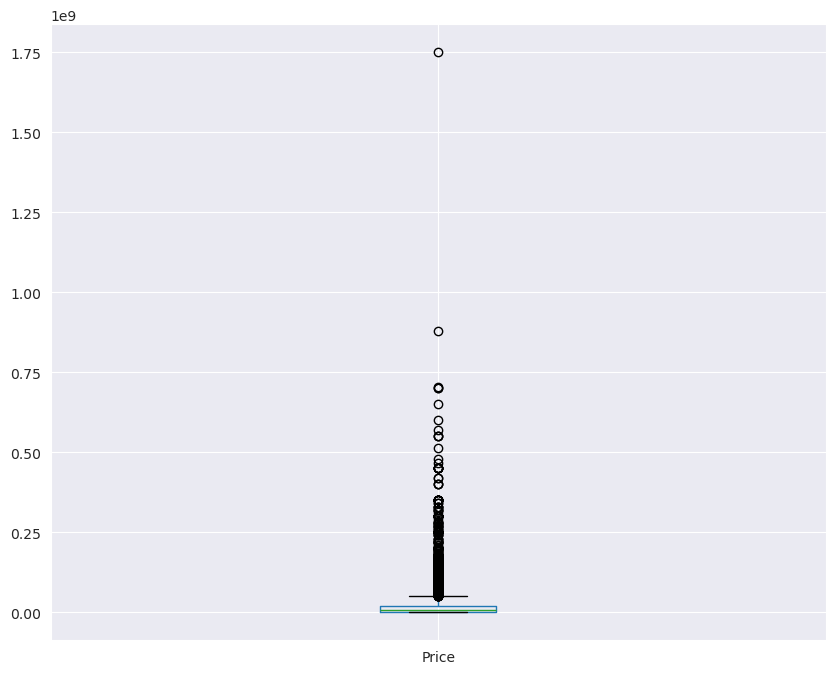

In [22]:
plt.figure(figsize=(10, 8))
final_df.boxplot(column='Price')
plt.show()

In [23]:
px.box(data_frame=final_df, y='Price')

Normal distribution Mean: 2.0764e+07, Skew: 9.021 and Std Deviation: 4.853e+07


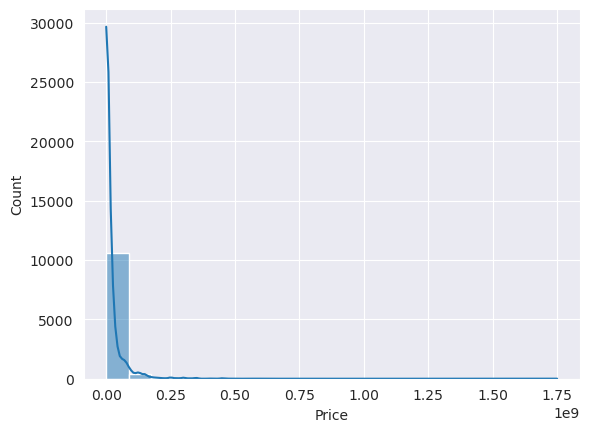

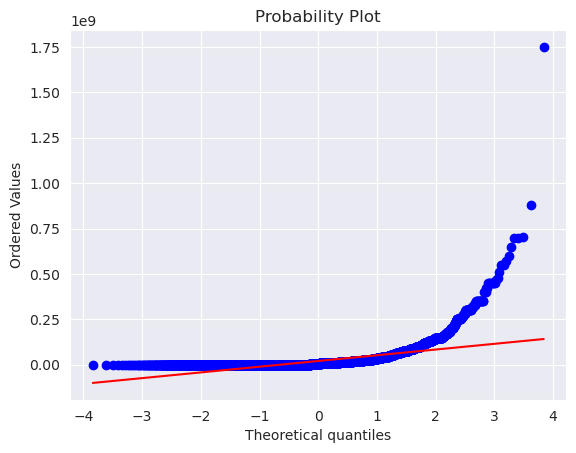

In [24]:
sns.histplot(final_df['Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df['Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df.Price.skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df['Price'], plot=plt)
plt.show()

Before removing the outliers, let's set a baseline with the data we got

<h2> Modelling </h2>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer
from math import sqrt

In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [27]:
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost' : XGBRegressor(),
    'LightGBM': LGBMRegressor(verbosity=-1),
    'CatBoost': CatBoostRegressor(verbose=False),
    'Gradient Boost': GradientBoostingRegressor()
}

In [28]:
X = final_df[['Bedrooms']]
y = final_df['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
def print_model_score(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('---------------------------------------------------------')
        print(model_name)
        print(f"Test data RMSE: {sqrt(mean_squared_error(y_pred=pred, y_true=y_test)):.6}")
        print(f"Test data R2 Score: {r2_score(y_pred=pred, y_true=y_test):.6}")

In [31]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 3.77928e+07
Test data R2 Score: 0.149484
---------------------------------------------------------
XGBoost
Test data RMSE: 3.7764e+07
Test data R2 Score: 0.15078
---------------------------------------------------------
LightGBM
Test data RMSE: 3.77301e+07
Test data R2 Score: 0.152301
---------------------------------------------------------
CatBoost
Test data RMSE: 3.77639e+07
Test data R2 Score: 0.150781
---------------------------------------------------------
Gradient Boost
Test data RMSE: 3.77622e+07
Test data R2 Score: 0.15086


<h2> Convert categorical columns to numeric </h2>

In [32]:
final_df.rename({'Payment_type': 'Payment Type', 'Sub_county': 'Sub County'}, axis=1, inplace=True)

In [33]:
final_df.columns

Index(['Bedrooms', 'Bathrooms', 'Date', 'Amenities', 'Property Type',
       'Payment Type', 'Price', 'Sub County'],
      dtype='object')

In [34]:
final_df.count()

Bedrooms         11215
Bathrooms        11215
Date             11215
Amenities        11215
Property Type    11215
Payment Type     11215
Price            11215
Sub County       11215
dtype: int64

In [35]:
string_cols = ['Sub County', 'Property Type', 'Payment Type']

In [36]:
ordinal_encoder = OrdinalEncoder()
final_df[string_cols] = ordinal_encoder.fit_transform(final_df[string_cols])
ordinal_encoder.categories_

[array(['Dagoretti North', 'Dagoretti South', 'Embakasi Central',
        'Embakasi East', 'Embakasi South', 'Embakasi West', 'Kamukunji',
        'Kasarani', 'Kibra', 'Langata', 'Makadara', 'Roysambu', 'Starehe',
        'Unknown', 'Westlands'], dtype=object),
 array(['flats-apartments', 'houses'], dtype=object),
 array(['rent', 'sale'], dtype=object)]

In [37]:
final_df.tail()

,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment Type,Price,Sub County
11260,3.0000,3.0000,2024-01-07,"['Alarm', 'Backup Generator', 'Balcony', 'CCTV...",0.0000,1.0000,43500000,14.0000
11261,3.0000,2.0000,2024-07-22,"['Backup Generator', 'Balcony', 'Bus Stop', 'C...",0.0000,1.0000,11250000,13.0000
11262,2.0000,2.0000,2024-07-16,"['Balcony', 'Electric Fence', 'En Suite', 'Fib...",0.0000,1.0000,9300000,14.0000
11263,4.0000,6.0000,2024-04-16,[],0.0000,1.0000,80000000,14.0000
11264,2.0000,2.0000,2024-04-16,[],0.0000,1.0000,28000000,14.0000


Save model for later use in deployment

In [38]:
import pickle
with open("subcounty_encoder.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)

<h2> Use one-hot encoding for the Amenities </h2>

In [39]:
def preprocess_amenities(amenities):
    amenities = amenities.replace('[', '')
    amenities = amenities.replace(']', '')
    amenities = amenities.replace("'", "")
    amenities = amenities.strip()
    return amenities

In [40]:
final_df['Amenities'] = final_df['Amenities'].apply(preprocess_amenities)

In [41]:
final_df['Amenities'].head()

0    Alarm, BBQ, Backup Generator, Balcony, Borehol...
1    Alarm, BBQ, Backup Generator, Balcony, Borehol...
2    Backup Generator, Balcony, En Suite, Garden, G...
4    Alarm, BBQ, Backup Generator, Balcony, Borehol...
5    Alarm, BBQ, Backup Generator, Balcony, Borehol...
Name: Amenities, dtype: object

In [42]:
mlb = MultiLabelBinarizer()

In [43]:
amenities_df = pd.DataFrame(mlb.fit_transform(final_df['Amenities'].str.split(', ')), columns=[x.strip() for x in mlb.classes_], index=final_df.index)

In [44]:
mlb.classes_

array(['', 'Aircon', 'Alarm', 'BBQ', 'Backup Generator', 'Balcony',
       'Borehole', 'Bus Stop', 'CCTV', 'Electric Fence', 'En Suite',
       'Fibre Internet', 'Furnished', 'Garden', 'Gated Community',
       'Golf Course', 'Gym', 'Hospital', 'Kids Play Area',
       'Lift/Elevator', 'Parking', 'Pet Friendly', 'Scenic View',
       'School', 'Sea View', 'Service Charge Included', 'Serviced',
       'Shopping Centre', 'Staff Quarters', 'Swimming Pool',
       'Walk In Closet', 'Wheelchair Access'], dtype=object)

In [45]:
amenities_df.head()

,,Aircon,Alarm,BBQ,Backup Generator,Balcony,Borehole,Bus Stop,CCTV,Electric Fence,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
0,0,0,1,1,1,1,1,1,1,1,...,0,1,0,1,0,1,1,1,1,1
1,0,0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
5,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,0,1,0


In [46]:
final_df = pd.concat([final_df.drop('Amenities', axis=1), amenities_df.drop('', axis=1)],axis=1)

In [47]:
final_df.head()

,Bedrooms,Bathrooms,Date,Property Type,Payment Type,Price,Sub County,Aircon,Alarm,BBQ,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
0,5.0000,5.0000,2024-07-23,1.0000,0.0000,350000,9.0000,0,1,1,...,0,1,0,1,0,1,1,1,1,1
1,5.0000,5.0000,2024-07-25,1.0000,0.0000,380000,9.0000,0,1,1,...,1,1,0,0,0,1,1,0,1,0
2,5.0000,5.0000,2024-07-19,1.0000,0.0000,430000,14.0000,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,4.0000,4.0000,2024-07-31,1.0000,0.0000,300000,14.0000,0,1,1,...,1,1,1,1,0,1,1,1,1,0
5,4.0000,4.0000,2024-07-31,1.0000,0.0000,300000,14.0000,0,1,1,...,1,1,0,1,0,1,1,0,1,0


In [48]:
print(final_df.corr().Price.sort_values(ascending=False).head())
print('\n')
print(final_df.corr().Price.sort_values(ascending=False).tail())

Price           1.0000
Payment Type    0.3766
Bedrooms        0.3382
Bathrooms       0.3371
Property Type   0.2635
Name: Price, dtype: float64


Gym                       -0.0814
Furnished                 -0.0988
Pet Friendly              -0.1068
Service Charge Included   -0.1796
Lift/Elevator             -0.1980
Name: Price, dtype: float64


In [49]:
X = final_df.drop(['Price', 'Date'], axis=1)
y = final_df['Price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 3.1214e+07
Test data R2 Score: 0.419819
---------------------------------------------------------
XGBoost
Test data RMSE: 3.04116e+07
Test data R2 Score: 0.449263
---------------------------------------------------------
LightGBM
Test data RMSE: 2.56819e+07
Test data R2 Score: 0.607248
---------------------------------------------------------
CatBoost
Test data RMSE: 2.75011e+07
Test data R2 Score: 0.549634
---------------------------------------------------------
Gradient Boost
Test data RMSE: 2.61477e+07
Test data R2 Score: 0.59287


LightGBM has the highest score - 0.60

<h2> Remove outliers </h2>

Apply Interquartile range to get rid of the outliers

In [52]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_df['Price'].quantile(0.25)
Q3 = final_df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
final_df_no_outliers = final_df[(final_df['Price'] >= lower_bound) & (final_df['Price'] <= upper_bound)].reset_index(drop=True)

In [53]:
px.box(data_frame=final_df, y='Price', title='Boxplot before IQR Outlier Removal')

In [54]:
px.box(data_frame=final_df_no_outliers, y='Price', title='Boxplot after IQR Outlier Removal')

In [55]:
print(f'Number of rows after IQR outlier removal: {final_df_no_outliers.Bedrooms.count()}')

Number of rows after IQR outlier removal: 9995


In [56]:
X = final_df_no_outliers.drop(['Price', 'Date'], axis=1)
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 4.66554e+06
Test data R2 Score: 0.841011
---------------------------------------------------------
XGBoost
Test data RMSE: 4.62873e+06
Test data R2 Score: 0.84351
---------------------------------------------------------
LightGBM
Test data RMSE: 4.41544e+06
Test data R2 Score: 0.8576
---------------------------------------------------------
CatBoost
Test data RMSE: 4.44444e+06
Test data R2 Score: 0.855724
---------------------------------------------------------
Gradient Boost
Test data RMSE: 4.66301e+06
Test data R2 Score: 0.841184


0.85 - That's even better than I expected

In [58]:
final_df_no_outliers.corr()

,Bedrooms,Bathrooms,Date,Property Type,Payment Type,Price,Sub County,Aircon,Alarm,BBQ,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
Bedrooms,1.0000,0.8912,0.0317,0.6077,-0.1956,0.1455,0.1778,0.0002,-0.0052,0.0714,...,-0.0606,0.0182,0.0143,0.0080,-0.1065,-0.0344,0.4882,-0.1921,0.1704,-0.0749
Bathrooms,0.8912,1.0000,0.0280,0.5208,-0.1969,0.1415,0.1564,0.0751,0.0702,0.1547,...,0.0152,0.0547,0.0661,0.0696,-0.0568,0.0004,0.4999,-0.0951,0.2340,0.0141
Date,0.0317,0.0280,1.0000,0.0263,-0.1194,-0.1082,-0.0128,0.0742,0.1096,0.0829,...,0.0783,0.0787,-0.0142,0.1726,0.0471,0.1162,0.1264,0.0255,0.1035,0.0454
Property Type,0.6077,0.5208,0.0263,1.0000,-0.1825,0.0048,0.2229,-0.0343,-0.0279,0.0429,...,-0.1066,0.0328,-0.0161,-0.0295,-0.0637,-0.0204,0.4645,-0.3464,0.0848,-0.1246
Payment Type,-0.1956,-0.1969,-0.1194,-0.1825,1.0000,0.7286,-0.1518,0.0490,-0.0839,-0.0790,...,-0.0179,-0.0383,0.0832,-0.4412,-0.0892,-0.0376,-0.1952,0.0477,-0.1097,0.0083
Price,0.1455,0.1415,-0.1082,0.0048,0.7286,1.0000,0.0046,0.0209,-0.0840,-0.0653,...,-0.0389,-0.0705,0.1154,-0.3553,-0.0686,-0.0974,-0.0020,0.0574,-0.0342,-0.0288
Sub County,0.1778,0.1564,-0.0128,0.2229,-0.1518,0.0046,1.0000,-0.0422,-0.0431,0.0063,...,-0.0211,-0.0203,0.1574,0.0074,-0.0090,-0.0474,0.0953,-0.0435,0.0153,-0.0642
Aircon,0.0002,0.0751,0.0742,-0.0343,0.0490,0.0209,-0.0422,1.0000,0.3993,0.3565,...,0.3189,0.2466,0.1928,0.2203,0.1684,0.1853,0.1062,0.1377,0.3233,0.3416
Alarm,-0.0052,0.0702,0.1096,-0.0279,-0.0839,-0.0840,-0.0431,0.3993,1.0000,0.5068,...,0.4052,0.4438,0.0430,0.3405,0.2321,0.3584,0.2123,0.2204,0.4037,0.4767
BBQ,0.0714,0.1547,0.0829,0.0429,-0.0790,-0.0653,0.0063,0.3565,0.5068,1.0000,...,0.4218,0.3700,0.1040,0.3242,0.1802,0.3053,0.2737,0.1922,0.4156,0.4422


<h2> Feature Selection </h2>

In [59]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [60]:
def lgb_model_performance(X_train, X_test, y_train, y_test):
    lgb_model = LGBMRegressor(verbosity=-1)

    lgb_model.fit(X_train, y_train)

    y_pred_train = lgb_model.predict(X_train)
    y_pred_test = lgb_model.predict(X_test)
    
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
    print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))
    
    return lgb_model

In [61]:
model = lgb_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  3809461.2973889867
Test Root Mean Squared Error:  4415444.5697303945


Training R2 Score:  0.8935167954944115
Test R2 Score:  0.8575997833837082


Plot Feature importance

In [62]:
feature_importances = model.feature_importances_
feature_names = X_train.columns
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

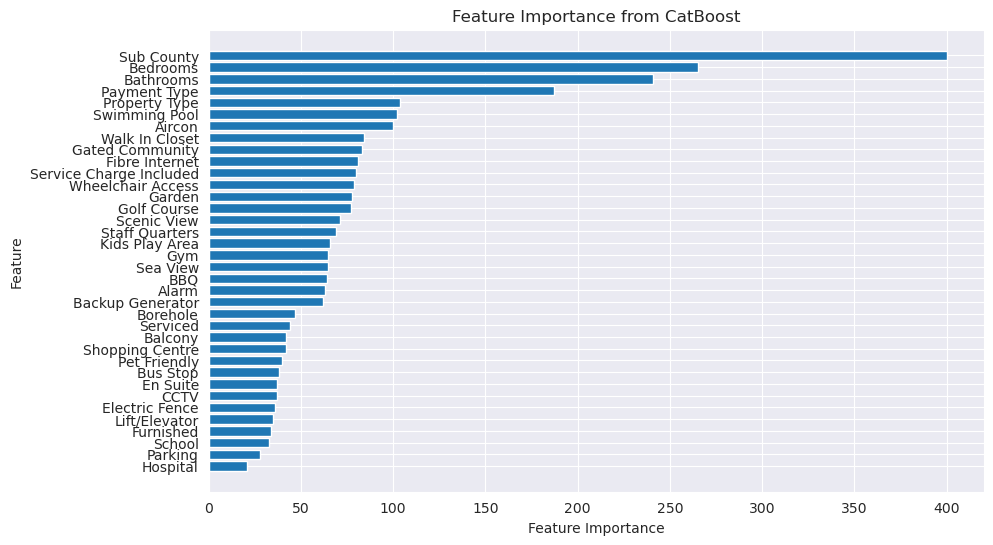

In [63]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [64]:
thresholds = sort(model.feature_importances_)

In [65]:
thresholds

array([ 21,  28,  33,  34,  35,  36,  37,  37,  38,  40,  42,  42,  44,
        47,  62,  63,  64,  65,  65,  66,  69,  71,  77,  78,  79,  80,
        81,  83,  84, 100, 102, 104, 187, 241, 265, 400], dtype=int32)

Select the right number of features needed for training

In [66]:
# Pick models with best performance above the provided thresholds
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = LGBMRegressor(verbosity=-1)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    r2 = r2_score(y_test, predictions)
    print(f"Threshold: {thresh}, Number of features: {select_X_train.shape[1]}, R2_Score: {r2:.5}")

Threshold: 21, Number of features: 36, R2_Score: 0.8576
Threshold: 28, Number of features: 35, R2_Score: 0.85724
Threshold: 33, Number of features: 34, R2_Score: 0.85695
Threshold: 34, Number of features: 33, R2_Score: 0.85634
Threshold: 35, Number of features: 32, R2_Score: 0.85485
Threshold: 36, Number of features: 31, R2_Score: 0.85418
Threshold: 37, Number of features: 30, R2_Score: 0.8551
Threshold: 37, Number of features: 30, R2_Score: 0.8551
Threshold: 38, Number of features: 28, R2_Score: 0.85385
Threshold: 40, Number of features: 27, R2_Score: 0.85505
Threshold: 42, Number of features: 26, R2_Score: 0.85439
Threshold: 42, Number of features: 26, R2_Score: 0.85439
Threshold: 44, Number of features: 24, R2_Score: 0.85229
Threshold: 47, Number of features: 23, R2_Score: 0.85349
Threshold: 62, Number of features: 22, R2_Score: 0.84932
Threshold: 63, Number of features: 21, R2_Score: 0.85072
Threshold: 64, Number of features: 20, R2_Score: 0.85131
Threshold: 65, Number of features:

All 36 columns yielded the best results

<h2>Log Transform the Target Variable</h2>

For deployment of the model, transforming prevents negative values in our predictions

In [67]:
def lgb_log_model_performance(X_train, X_test, y_train, y_test):
    lgb_model = LGBMRegressor(verbosity=-1)

    lgb_model.fit(X_train, y_train)

    y_pred_train = lgb_model.predict(X_train)
    y_pred_test = lgb_model.predict(X_test)
    
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(y_pred_train))))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=np.exp(y_test), y_pred=np.exp(y_pred_test))))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_pred_train)))
    print('Test R2 Score: ', r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_pred_test)))
    
    return lgb_model

In [68]:
log_y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.2, random_state=101)
model = lgb_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  0.3594171862242226
Test Root Mean Squared Error:  0.36496687406298156


Training R2 Score:  0.9738988320644415
Test R2 Score:  0.9725515226430964


This is the score without reverting the predictions back to their original price

In [69]:
log_model = lgb_log_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  4381212.317534332
Test Root Mean Squared Error:  4527325.510003601


Training R2 Score:  0.8591546280735303
Test R2 Score:  0.8502919279330118


The score is still pretty decent - 0.85

<h2>CV Mean Score</h2>

In [70]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold
from sklearn.metrics import make_scorer

K-Fold

In [71]:
def custom_r2_score(y_true, y_pred):
    y_true_exp = np.exp(y_true)
    y_pred_exp = np.exp(y_pred)
    return r2_score(y_true=y_true_exp, y_pred=y_pred_exp)

def custom_rmse_score(y_true, y_pred):
    y_true_exp = np.exp(y_true)
    y_pred_exp = np.exp(y_pred)
    return sqrt(mean_squared_error(y_true=y_true_exp, y_pred=y_pred_exp))

custom_r2_scorer = make_scorer(custom_r2_score)
custom_rmse_scorer = make_scorer(custom_rmse_score)

In [72]:
cv = KFold(n_splits=5, random_state=101, shuffle=True)
model = LGBMRegressor(verbosity=-1)
r2_scores = cross_val_score(model, X, log_y, scoring=custom_r2_scorer, cv=cv, n_jobs=-1)
print(f'Cross validation R2 Score: {np.mean(r2_scores)}')
rmse_scores = cross_val_score(model, X, log_y, scoring=custom_rmse_scorer, cv=cv, n_jobs=-1)
print(f'Cross validation Root Mean Squared Error: {np.abs(np.mean(rmse_scores))}')

Cross validation R2 Score: 0.8316372227288783
Cross validation Root Mean Squared Error: 4788619.88033842


Repeated K-Fold

R:1, Cross validation R2 Score: 0.8338880607394742
R:2, Cross validation R2 Score: 0.833578789999365
R:3, Cross validation R2 Score: 0.833578180425395
R:4, Cross validation R2 Score: 0.8336912977336786
R:5, Cross validation R2 Score: 0.8338287958996873
R:6, Cross validation R2 Score: 0.8335307441372704
R:7, Cross validation R2 Score: 0.8334878976249105
R:8, Cross validation R2 Score: 0.8335835821663927
R:9, Cross validation R2 Score: 0.833568769425645
R:10, Cross validation R2 Score: 0.8334112782707302


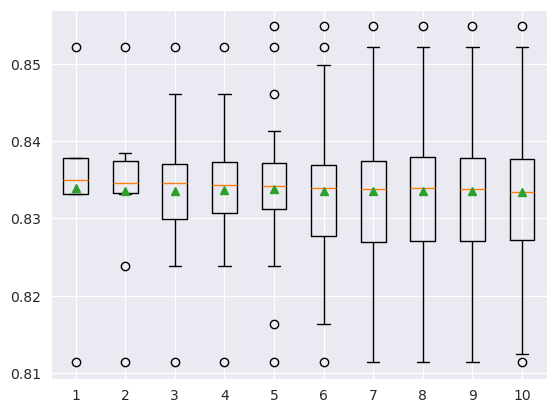

In [73]:
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    model = LGBMRegressor(verbosity=-1)
    r2_scores = cross_val_score(model, X, y, scoring=custom_r2_scorer, cv=cv, n_jobs=-1)
    return r2_scores

repeats = range(1,11)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, log_y, r)
    # summarize
    print(f'R:{r}, Cross validation R2 Score: {np.mean(scores)}')
    # store
    results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

Final score of 0.83. Good enough for deployment!

<h2>Save Model</h2>

Sort appearance by importance

In [74]:
fi_df

,feature,importance
4,Sub County,400
0,Bedrooms,265
1,Bathrooms,241
3,Payment Type,187
2,Property Type,104
33,Swimming Pool,102
5,Aircon,100
34,Walk In Closet,84
18,Gated Community,83
15,Fibre Internet,81


In [75]:
fi_df.feature.values

array(['Sub County', 'Bedrooms', 'Bathrooms', 'Payment Type',
       'Property Type', 'Swimming Pool', 'Aircon', 'Walk In Closet',
       'Gated Community', 'Fibre Internet', 'Service Charge Included',
       'Wheelchair Access', 'Garden', 'Golf Course', 'Scenic View',
       'Staff Quarters', 'Kids Play Area', 'Gym', 'Sea View', 'BBQ',
       'Alarm', 'Backup Generator', 'Borehole', 'Serviced', 'Balcony',
       'Shopping Centre', 'Pet Friendly', 'Bus Stop', 'En Suite', 'CCTV',
       'Electric Fence', 'Lift/Elevator', 'Furnished', 'School',
       'Parking', 'Hospital'], dtype=object)

In [76]:
X_train = X_train[fi_df.feature.values]

In [77]:
X_train.columns

Index(['Sub County', 'Bedrooms', 'Bathrooms', 'Payment Type', 'Property Type',
       'Swimming Pool', 'Aircon', 'Walk In Closet', 'Gated Community',
       'Fibre Internet', 'Service Charge Included', 'Wheelchair Access',
       'Garden', 'Golf Course', 'Scenic View', 'Staff Quarters',
       'Kids Play Area', 'Gym', 'Sea View', 'BBQ', 'Alarm', 'Backup Generator',
       'Borehole', 'Serviced', 'Balcony', 'Shopping Centre', 'Pet Friendly',
       'Bus Stop', 'En Suite', 'CCTV', 'Electric Fence', 'Lift/Elevator',
       'Furnished', 'School', 'Parking', 'Hospital'],
      dtype='object')

In [78]:
model = LGBMRegressor(verbosity=-1)
model.fit(X_train, y_train)

LGBMRegressor(verbosity=-1)

In [83]:
model.feature_names = list(X_train.columns.values)

In [88]:
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))